In [1]:
!pip install requests pandas scikit-learn matplotlib seaborn


Model: Linear Regression
Mean Absolute Error (MAE): 2282.88
Mean Squared Error (MSE): 9053766.25
R-squared (R^2) Score: 0.45
------------------------------
Model: Decision Tree Regression
Mean Absolute Error (MAE): 1741.27
Mean Squared Error (MSE): 5568640.31
R-squared (R^2) Score: 0.66
------------------------------
Model: Random Forest Regression
Mean Absolute Error (MAE): 1416.38
Mean Squared Error (MSE): 3376068.33
R-squared (R^2) Score: 0.79
------------------------------
Model: SVR
Mean Absolute Error (MAE): 2439.97
Mean Squared Error (MSE): 9168920.90
R-squared (R^2) Score: 0.44
------------------------------
Model: Gradient Boosting Regression
Mean Absolute Error (MAE): 1411.82
Mean Squared Error (MSE): 3292290.00
R-squared (R^2) Score: 0.80
------------------------------
Ensemble Approach
Mean Absolute Error (MAE): 1318.67
Mean Squared Error (MSE): 2940176.41
R-squared (R^2) Score: 0.82


<ipython-input-2-45602fed6d14>:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names + ['Ensemble Approach'], y=mae_scores, palette="viridis")
<ipython-input-2-45602fed6d14>:115: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names + ['Ensemble Approach'], y=mse_scores, palette="viridis")
<ipython-input-2-45602fed6d14>:121: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names + ['Ensemble Approach'], y=r2_scores, palette="viridis")


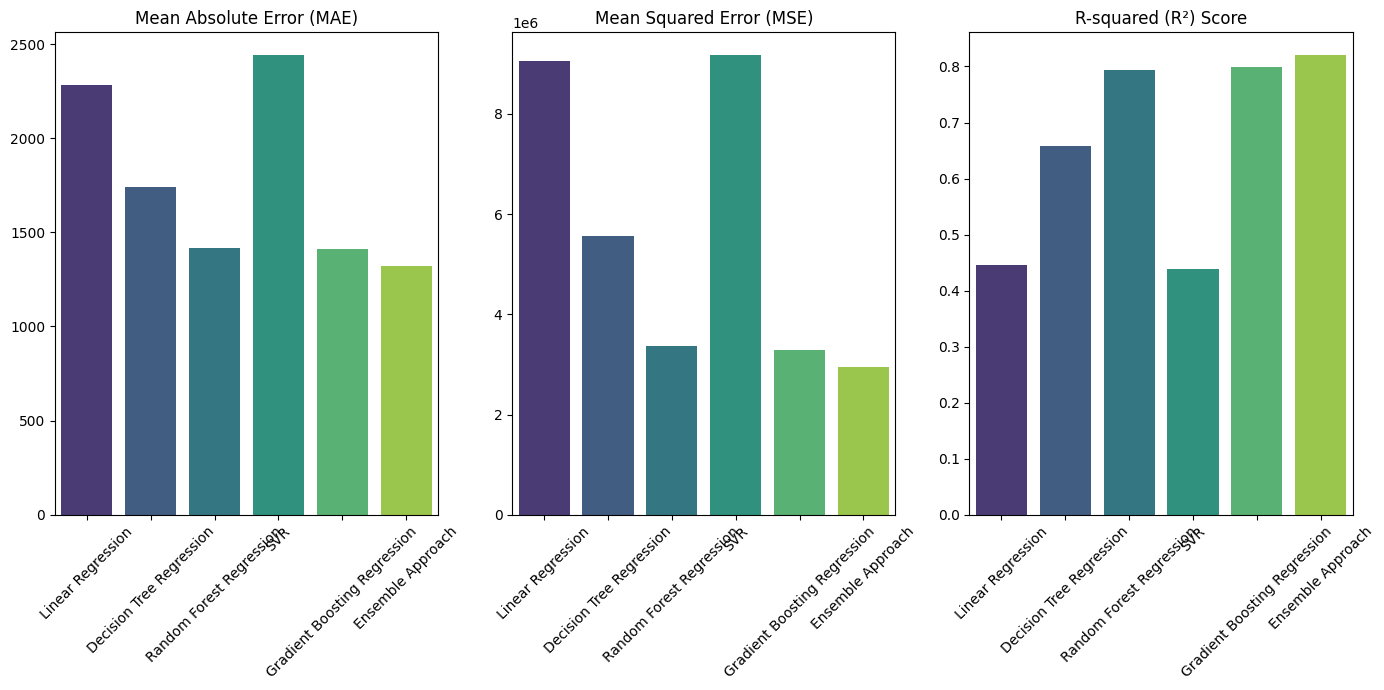

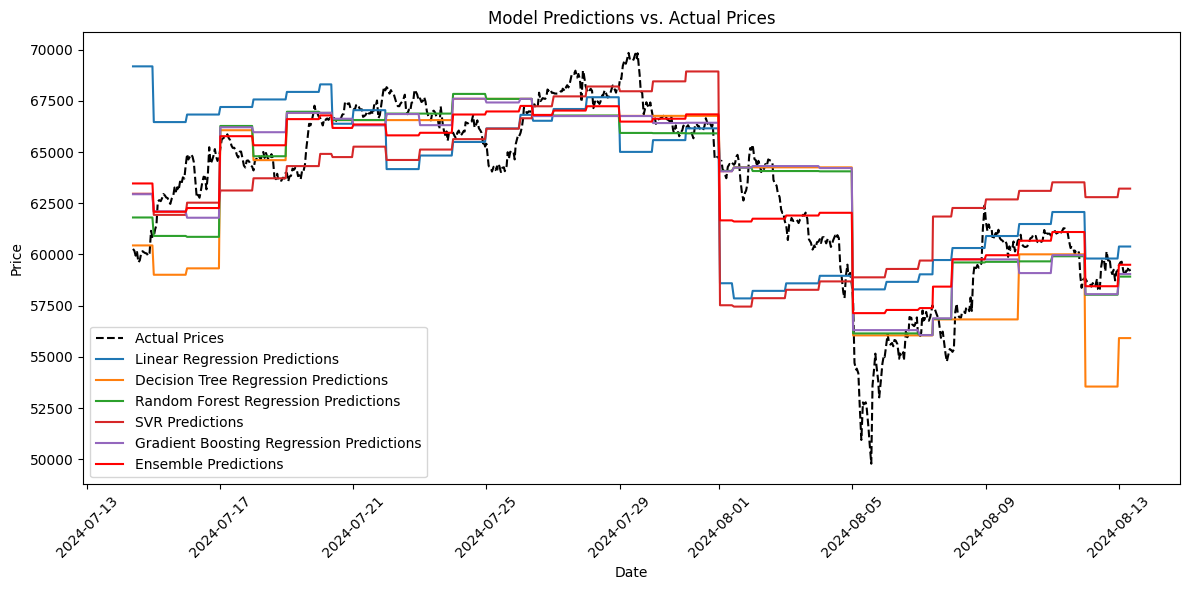

In [2]:
import requests
import pandas as pd
import numpy as np
from datetime import timedelta
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Parameters
crypto_symbol = 'bitcoin'  # Default value; can be changed
days = 30

# Fetch historical price data from CoinGecko
url = f'https://api.coingecko.com/api/v3/coins/{crypto_symbol}/market_chart'
params = {'vs_currency': 'usd', 'days': days}

response = requests.get(url, params=params)
response.raise_for_status()
data = response.json()

# Check if 'prices' key is present in the API response
if 'prices' not in data:
    raise KeyError("'prices' key not found in the API response.")

# Extract prices and timestamps
prices = [point[1] for point in data['prices']]
timestamps = [point[0] for point in data['prices']]

# Create a Pandas DataFrame
df = pd.DataFrame({'timestamp': timestamps, 'price': prices})

# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

# Feature engineering: extracting date-related features
df['day_of_week'] = df['timestamp'].dt.dayofweek
df['day'] = df['timestamp'].dt.day
df['month'] = df['timestamp'].dt.month

# Split the data into training and testing sets
X = df[['day_of_week', 'day', 'month']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create regression models
linear_model = LinearRegression()
decision_tree_model = DecisionTreeRegressor(random_state=42)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
svr_model = SVR(kernel='linear')  # Support Vector Regression with a linear kernel
gradient_boosting_model = GradientBoostingRegressor(random_state=42)

# Train models
trained_models = [linear_model, decision_tree_model, random_forest_model, svr_model, gradient_boosting_model]
for model in trained_models:
    model.fit(X_train, y_train)

# Perform cross-validation and evaluate each model
ensemble_predictions = []
model_names = ['Linear Regression', 'Decision Tree Regression', 'Random Forest Regression', 'SVR', 'Gradient Boosting Regression']
mae_scores = []
mse_scores = []
r2_scores = []

for i, model in enumerate(trained_models):
    # Perform cross-validation and get predictions
    y_cv_pred = cross_val_predict(model, X, y, cv=5)
    ensemble_predictions.append(y_cv_pred)

    # Evaluate the model
    mae = mean_absolute_error(y, y_cv_pred)
    mse = mean_squared_error(y, y_cv_pred)
    r2 = r2_score(y, y_cv_pred)

    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)

    print(f"Model: {model_names[i]}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R^2) Score: {r2:.2f}")
    print("-" * 30)

# Ensemble approach: Average the predictions from all models
y_pred_ensemble = np.mean(ensemble_predictions, axis=0)
mae_ensemble = mean_absolute_error(y, y_pred_ensemble)
mse_ensemble = mean_squared_error(y, y_pred_ensemble)
r2_ensemble = r2_score(y, y_pred_ensemble)

mae_scores.append(mae_ensemble)
mse_scores.append(mse_ensemble)
r2_scores.append(r2_ensemble)

print("Ensemble Approach")
print(f"Mean Absolute Error (MAE): {mae_ensemble:.2f}")
print(f"Mean Squared Error (MSE): {mse_ensemble:.2f}")
print(f"R-squared (R^2) Score: {r2_ensemble:.2f}")

# Plotting accuracy metrics
plt.figure(figsize=(14, 7))

# MAE
plt.subplot(1, 3, 1)
sns.barplot(x=model_names + ['Ensemble Approach'], y=mae_scores, palette="viridis")
plt.title('Mean Absolute Error (MAE)')
plt.xticks(rotation=45)

# MSE
plt.subplot(1, 3, 2)
sns.barplot(x=model_names + ['Ensemble Approach'], y=mse_scores, palette="viridis")
plt.title('Mean Squared Error (MSE)')
plt.xticks(rotation=45)

# R^2 Score
plt.subplot(1, 3, 3)
sns.barplot(x=model_names + ['Ensemble Approach'], y=r2_scores, palette="viridis")
plt.title('R-squared (R²) Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Plotting Predictions vs. Actual Prices
plt.figure(figsize=(12, 6))

# Actual Prices
plt.plot(df['timestamp'], df['price'], label='Actual Prices', color='black', linestyle='--')

# Predictions for each model
for i, model in enumerate(trained_models):
    y_pred = cross_val_predict(model, X, y, cv=5)
    plt.plot(df['timestamp'], y_pred, label=f'{model_names[i]} Predictions')

# Ensemble Predictions
plt.plot(df['timestamp'], np.mean(ensemble_predictions, axis=0), label='Ensemble Predictions', color='red')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Model Predictions vs. Actual Prices')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
